In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/laptop_prices.csv')
df.sample()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
684,Lenovo,Yoga 730,2 in 1 Convertible,13.3,8,Windows 10,1.19,1499.0,Full HD,1920,...,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Intel,UHD Graphics 620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.isnull().sum()

,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
df.shape

(1275, 23)

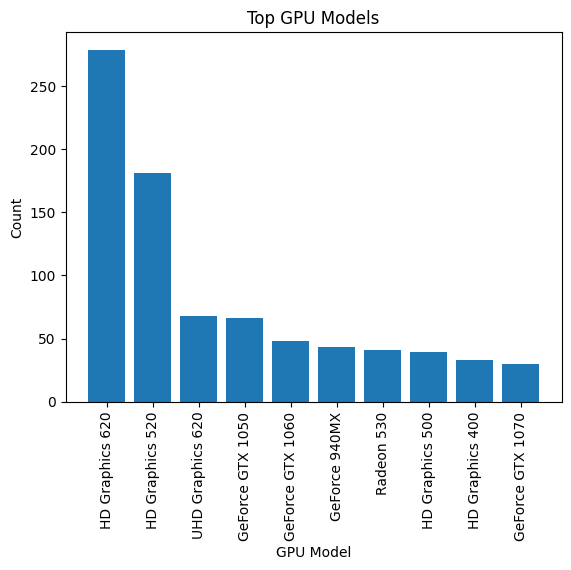

In [ ]:
gpu_10_count = df['GPU_model'].value_counts().head(10)
plt.bar(gpu_10_count.index, gpu_10_count.values)
plt.title('Top GPU Models')
plt.xlabel('GPU Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.select_dtypes(include = 'number').columns

Index(['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')

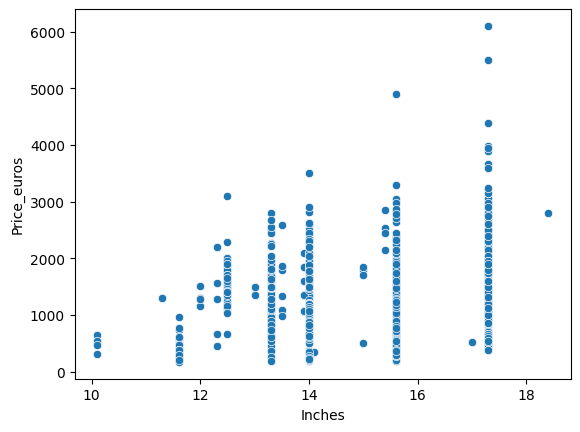

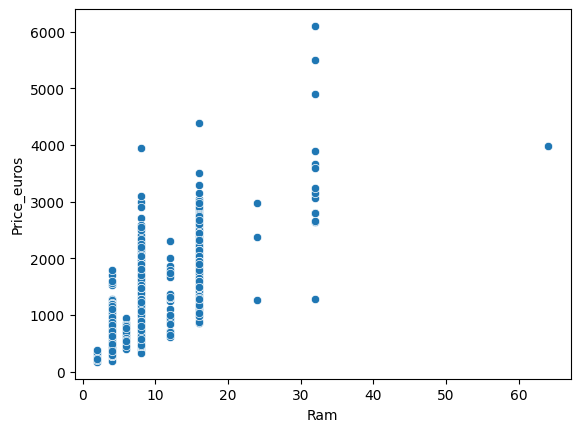

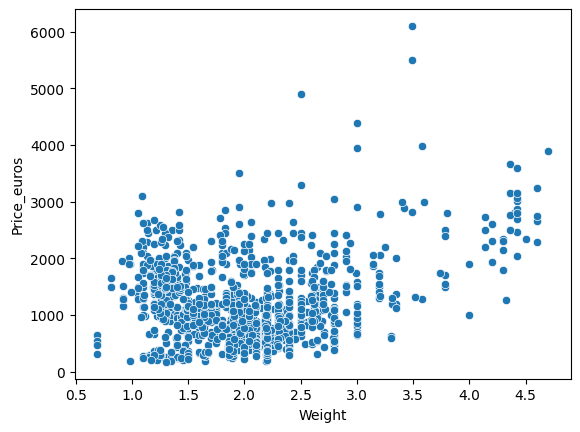

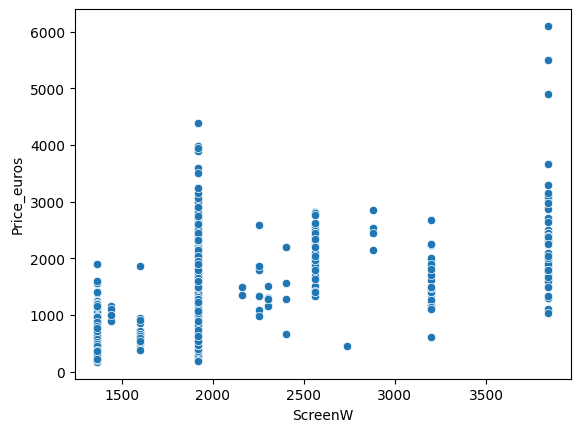

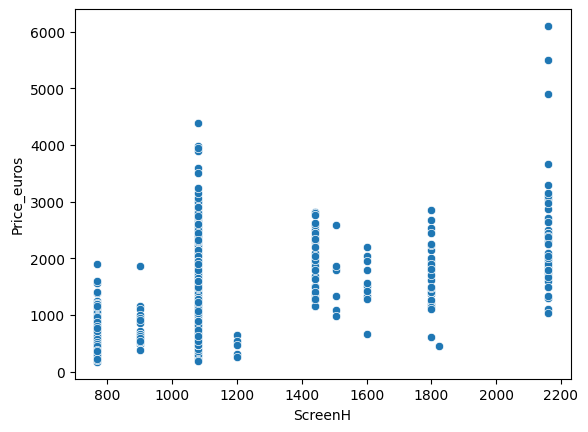

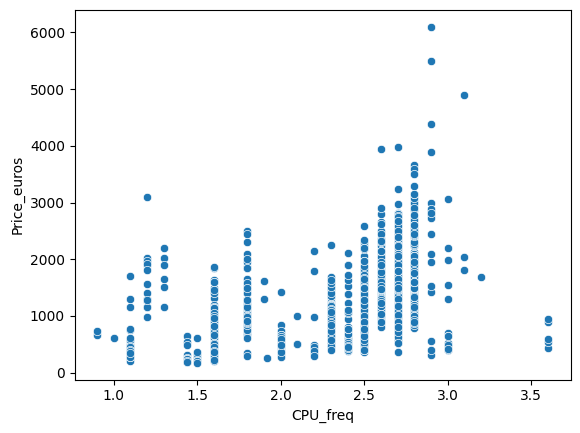

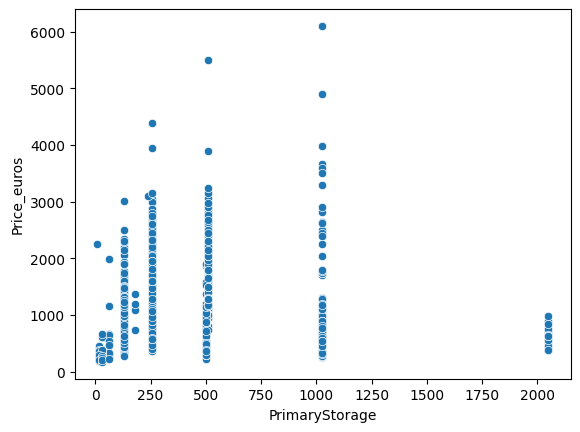

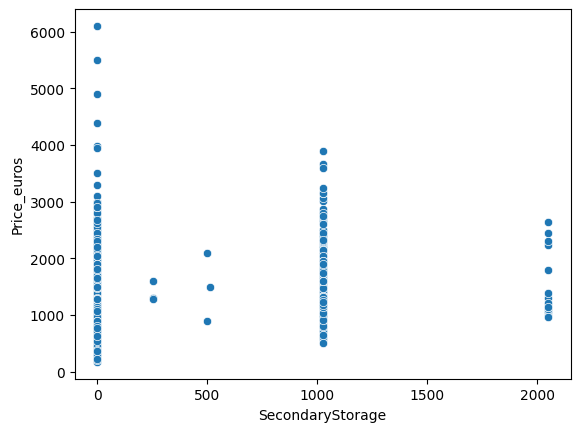

In [ ]:
for i in ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']:
       sns.scatterplot(data = df, x = df[i], y =  'Price_euros' )
       plt.show()

In [ ]:
df.select_dtypes(include = 'object').columns

Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model'],
      dtype='object')

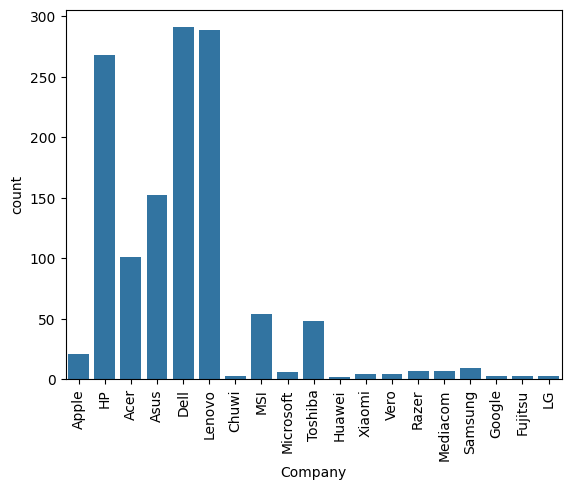

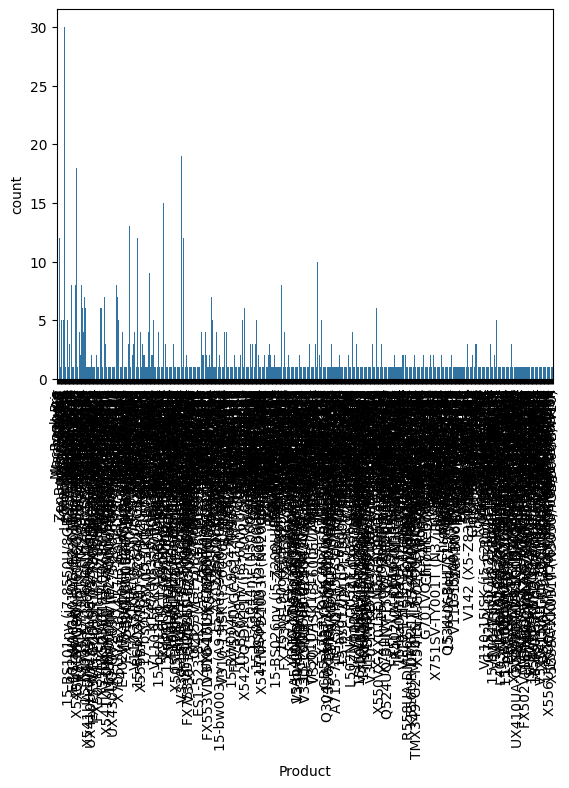

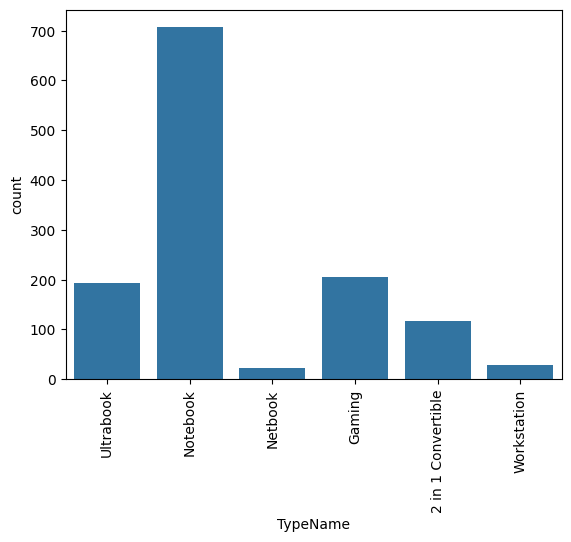

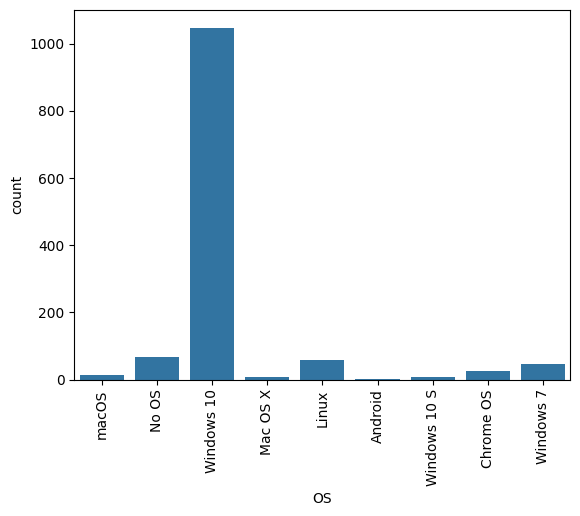

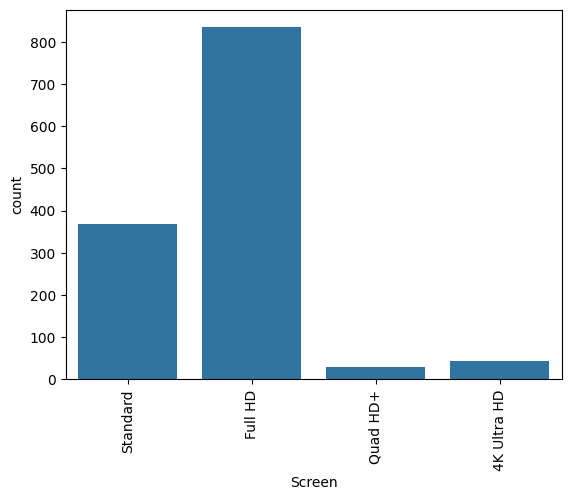

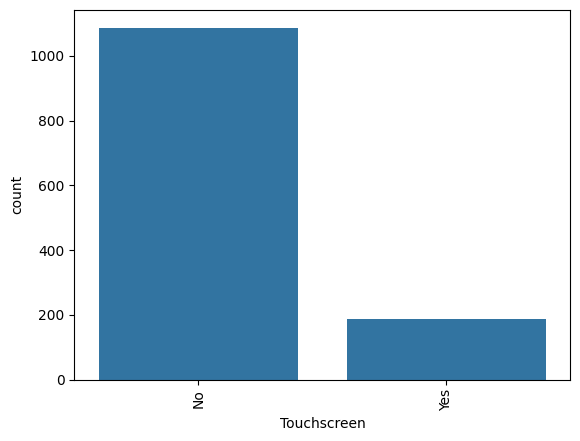

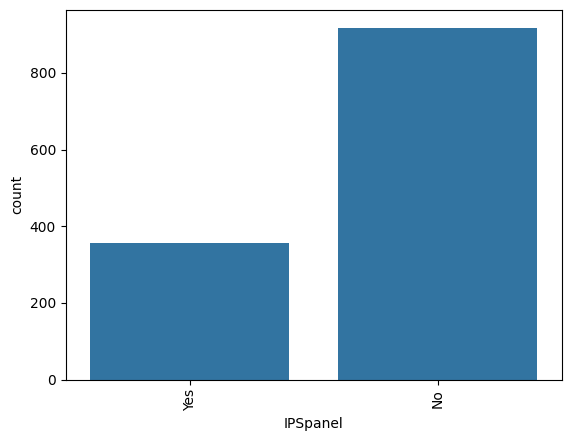

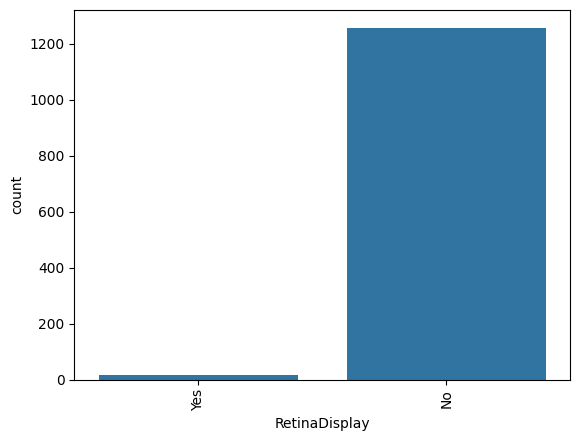

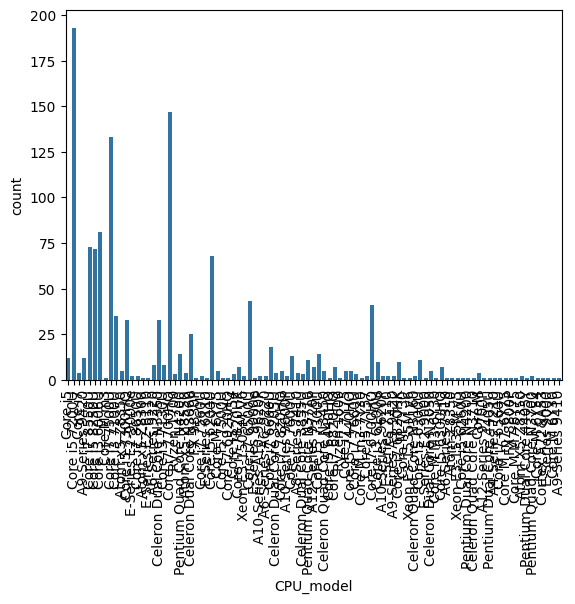

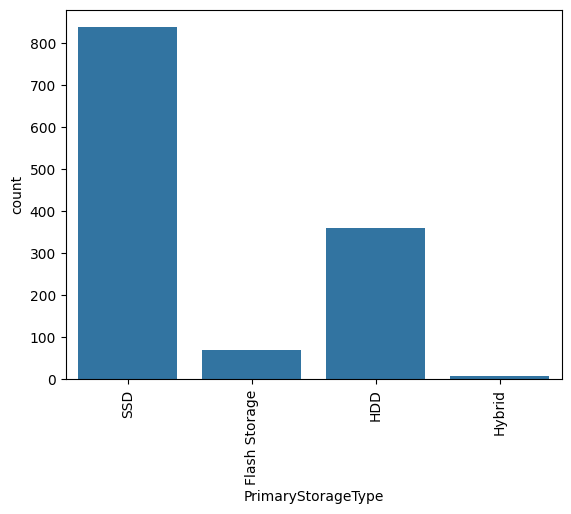

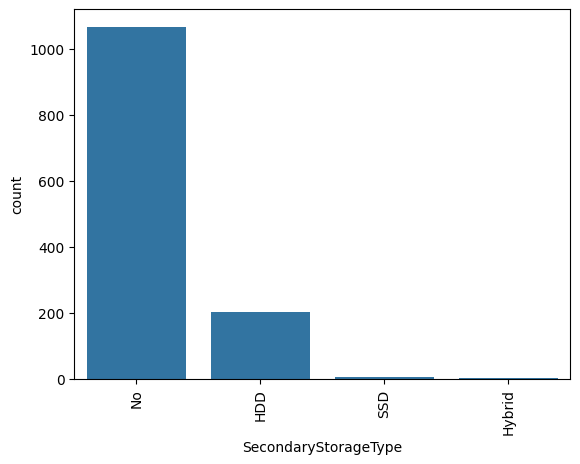

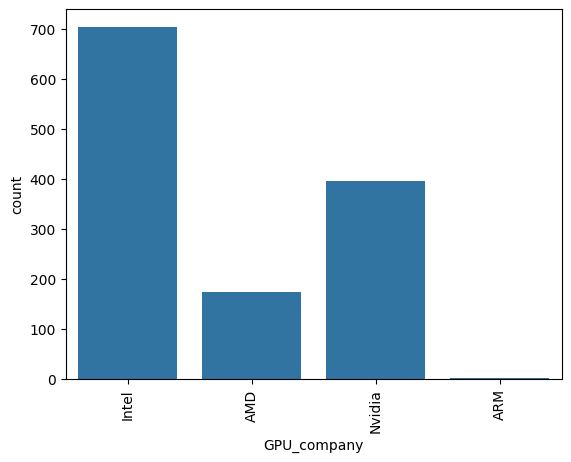

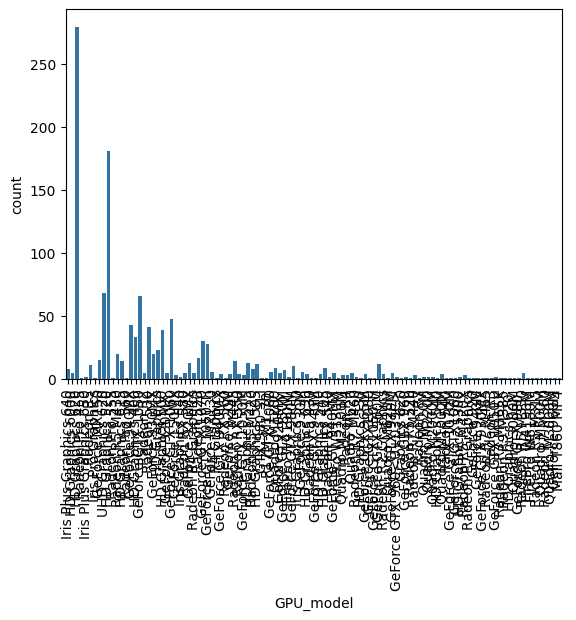

In [ ]:
for i in ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_model',
       'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company',
       'GPU_model']:
       sns.countplot(data = df, x = df[i])
       plt.xticks(rotation = 90)
       plt.show()

In [ ]:
df.nunique()

,0
Company,19
Product,618
TypeName,6
Inches,18
Ram,9
OS,9
Weight,171
Price_euros,791
Screen,4
ScreenW,13


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['GPU_model'].value_counts()

,count
GPU_model,
HD Graphics 620,279
HD Graphics 520,181
UHD Graphics 620,68
GeForce GTX 1050,66
GeForce GTX 1060,48
...,...
Quadro M500M,1
Radeon R7 M360,1
Quadro M3000M,1


In [ ]:
price_corr = df.select_dtypes(include= 'number').corr()[ 'Price_euros']

<Axes: >

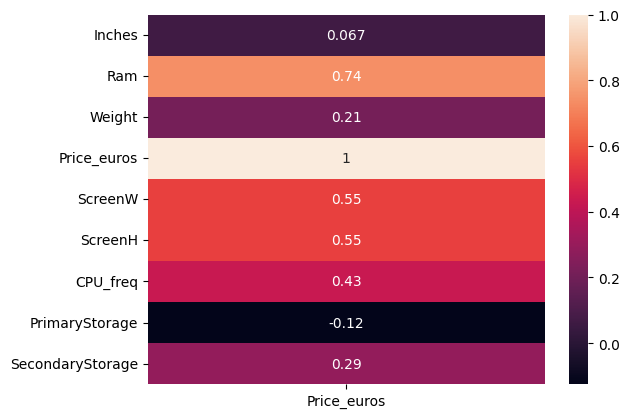

In [ ]:
sns.heatmap(price_corr.to_frame(), annot = True)

##Feature Engineering
Creating pixels per inches column for better analysis

In [ ]:
df['ppi'] = ((df['ScreenW']**2) + (df['ScreenH']**2))**0.5/df['Inches']

In [ ]:
df.drop(columns = ['ScreenW', 'ScreenH'], inplace = True)

In [ ]:
for i in ['Touchscreen', 'IPSpanel', 'RetinaDisplay']:
  df[i] = df[i].map({'Yes': 1, 'No': 0})

In [ ]:
df.select_dtypes(include = 'object').columns

Index(['Company', 'Product', 'TypeName', 'OS', 'Screen', 'CPU_company',
       'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model'],
      dtype='object')

Encoding the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'CPU_company',
       'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
       'GPU_company', 'GPU_model']:
       df[i] = le.fit_transform(df[i])

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'Price_euros')
y = df['Price_euros']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.7381758043456257
MAE:  257.92668779443335




```
# This is formatted as code
```

### KNN Regression

In [ ]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.5546168894588306
MAE:  264.3823058823529


# Decision Tree Regression

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.7033902172586763
MAE:  239.62086274509804


#Random Forest Regression

In [ ]:
rfc = RandomForestRegressor()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('R2 Score: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 Score:  0.8781212750167114
MAE:  160.11421356115778


##KNN Regression
R2 Score:  0.5546168894588306;
MAE:  264.3823058823529

##Linear Regression
R2 Score:  0.7381758043456257;
MAE:  257.92668779443335

##Decision Tree Regression
R2 Score:  0.7033902172586763;
MAE:  239.62086274509804

##Random Forest Regression
R2 Score:  0.8781212750167114;
MAE:  160.11421356115778